In [1]:
import pandas as pd
import numpy as np
import requests
from datetime import datetime, date
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.dates as mdates


In [2]:
limit = 1500
dfMovies = pd.read_json(f'http://localhost:8000/movies?limit={limit}')
dfMovies.set_index('id', inplace=True)
dfMovies

,title,year,duration
id,,,
5257,Excuse Me,1915,50.0
6366,Anton the Terrible,1916,50.0
8351,The Mysterious Mrs. Musslewhite,1917,50.0
8384,On the Level,1917,50.0
8642,The Sunset Trail,1917,50.0
...,...,...,...
12771924,LALALA,2004,125.0
12771925,LALALA,2004,126.0
12771927,LALALA,2004,126.0


In [3]:
type(dfMovies)

pandas.core.frame.DataFrame

In [4]:
dfStatsMovieByYear = pd.read_json('http://localhost:8000/movies/count_by_year')
dfStatsMovieByYear.columns=['year', 'movie_count']
#dfStatsMovieByYear.set_index('year', inplace=True)
dfStatsMovieByYear

,year,movie_count
0,1915,1
1,1916,1
2,1917,7
3,1918,10
4,1919,10
...,...,...
104,2019,28
105,2020,6
106,2021,1
107,2022,1


In [5]:
# le résultat n'est pas fameux
dfStatsMovieByDirector = pd.read_json('http://localhost:8000/stars/stats_movie_by_director')
dfStatsMovieByDirector

,0,1
0,"{'birthdate': '1899-08-13', 'name': 'Alfred Hi...",61
1,"{'birthdate': '1942-11-17', 'name': 'Martin Sc...",48
2,"{'birthdate': '1946-12-18', 'name': 'Steven Sp...",41
3,"{'birthdate': '1930-05-31', 'name': 'Clint Eas...",39
4,"{'birthdate': '1940-09-11', 'name': 'Brian De ...",38
5,"{'birthdate': '1937-11-30', 'name': 'Ridley Sc...",35
6,"{'birthdate': '1946-09-22', 'name': 'John Woo'...",34
7,"{'birthdate': '1959-10-23', 'name': 'Sam Raimi...",31
8,"{'birthdate': '1969-10-09', 'name': 'Steve McQ...",31
9,"{'birthdate': None, 'name': 'John Ford', 'id':...",20


In [6]:
response = requests.get('http://localhost:8000/stars/stats_movie_by_director')
response

<Response [200]>

In [7]:
if response.status_code == 200:
    print('Response OK')
else:
    print('Error', response.status_code, response.json(), sep=', ')

Response OK


In [8]:
data_json = response.json()
data_json

[[{'birthdate': '1899-08-13', 'name': 'Alfred Hitchcock', 'id': 33}, 61],
 [{'birthdate': '1942-11-17', 'name': 'Martin Scorsese', 'id': 217}, 48],
 [{'birthdate': '1946-12-18', 'name': 'Steven Spielberg', 'id': 229}, 41],
 [{'birthdate': '1930-05-31', 'name': 'Clint Eastwood', 'id': 142}, 39],
 [{'birthdate': '1940-09-11', 'name': 'Brian De Palma', 'id': 361}, 38],
 [{'birthdate': '1937-11-30', 'name': 'Ridley Scott', 'id': 631}, 35],
 [{'birthdate': '1946-09-22', 'name': 'John Woo', 'id': 247}, 34],
 [{'birthdate': '1959-10-23', 'name': 'Sam Raimi', 'id': 600}, 31],
 [{'birthdate': '1969-10-09', 'name': 'Steve McQueen', 'id': 2588606}, 31],
 [{'birthdate': None, 'name': 'John Ford', 'id': 406}, 20],
 [{'birthdate': '1961-10-31', 'name': 'Peter Jackson', 'id': 1392}, 19],
 [{'birthdate': '1956-10-20', 'name': 'Danny Boyle', 'id': 965}, 18],
 [{'birthdate': None, 'name': 'Walter Edwards', 'id': 250445}, 14],
 [{'birthdate': '1954-08-16', 'name': 'James Cameron', 'id': 116}, 14],
 [{'bi

In [9]:
# applatir en liste de tuples
data_flatten = [ (director_dict['id'], director_dict['name'], director_dict['birthdate'], movie_count )  
         for director_dict, movie_count in data_json ]
data_flatten

[(33, 'Alfred Hitchcock', '1899-08-13', 61),
 (217, 'Martin Scorsese', '1942-11-17', 48),
 (229, 'Steven Spielberg', '1946-12-18', 41),
 (142, 'Clint Eastwood', '1930-05-31', 39),
 (361, 'Brian De Palma', '1940-09-11', 38),
 (631, 'Ridley Scott', '1937-11-30', 35),
 (247, 'John Woo', '1946-09-22', 34),
 (600, 'Sam Raimi', '1959-10-23', 31),
 (2588606, 'Steve McQueen', '1969-10-09', 31),
 (406, 'John Ford', None, 20),
 (1392, 'Peter Jackson', '1961-10-31', 19),
 (965, 'Danny Boyle', '1956-10-20', 18),
 (250445, 'Walter Edwards', None, 14),
 (116, 'James Cameron', '1954-08-16', 14),
 (233, 'Quentin Tarantino', '1963-03-27', 14),
 (634240, 'Christopher Nolan', '1970-07-30', 13),
 (102908, 'Robert N. Bradbury', None, 13),
 (1053, 'Ethan Coen', '1957-09-21', 12),
 (94435, 'Bong Joon Ho', '1969-09-14', 12),
 (1054, 'Joel Coen', '1954-11-29', 11)]

In [10]:
# applatir en list de dicts
data_flatten = [ {**director_dict, 'movie_count': movie_count }  
         for director_dict, movie_count in data_json ]
data_flatten

[{'birthdate': '1899-08-13',
  'name': 'Alfred Hitchcock',
  'id': 33,
  'movie_count': 61},
 {'birthdate': '1942-11-17',
  'name': 'Martin Scorsese',
  'id': 217,
  'movie_count': 48},
 {'birthdate': '1946-12-18',
  'name': 'Steven Spielberg',
  'id': 229,
  'movie_count': 41},
 {'birthdate': '1930-05-31',
  'name': 'Clint Eastwood',
  'id': 142,
  'movie_count': 39},
 {'birthdate': '1940-09-11',
  'name': 'Brian De Palma',
  'id': 361,
  'movie_count': 38},
 {'birthdate': '1937-11-30',
  'name': 'Ridley Scott',
  'id': 631,
  'movie_count': 35},
 {'birthdate': '1946-09-22', 'name': 'John Woo', 'id': 247, 'movie_count': 34},
 {'birthdate': '1959-10-23',
  'name': 'Sam Raimi',
  'id': 600,
  'movie_count': 31},
 {'birthdate': '1969-10-09',
  'name': 'Steve McQueen',
  'id': 2588606,
  'movie_count': 31},
 {'birthdate': None, 'name': 'John Ford', 'id': 406, 'movie_count': 20},
 {'birthdate': '1961-10-31',
  'name': 'Peter Jackson',
  'id': 1392,
  'movie_count': 19},
 {'birthdate': '195

In [11]:
dfStatsMovieByDirector = pd.DataFrame(data_flatten)
dfStatsMovieByDirector.set_index('id', inplace=True)
dfStatsMovieByDirector

,birthdate,name,movie_count
id,,,
33,1899-08-13,Alfred Hitchcock,61
217,1942-11-17,Martin Scorsese,48
229,1946-12-18,Steven Spielberg,41
142,1930-05-31,Clint Eastwood,39
361,1940-09-11,Brian De Palma,38
631,1937-11-30,Ridley Scott,35
247,1946-09-22,John Woo,34
600,1959-10-23,Sam Raimi,31
2588606,1969-10-09,Steve McQueen,31


In [12]:
dfStatsMovieByDirector.loc[33].birthdate

'1899-08-13'

In [13]:
datetime.strptime('1899-08-13', '%Y-%m-%d').date()

datetime.date(1899, 8, 13)

In [14]:
pd.to_datetime('1899-08-13')

Timestamp('1899-08-13 00:00:00')

In [15]:
dfStatsMovieByDirector[dfStatsMovieByDirector.birthdate.isnull()]

,birthdate,name,movie_count
id,,,
406,None,John Ford,20
250445,None,Walter Edwards,14
102908,None,Robert N. Bradbury,13


In [16]:
dfStatsMovieByDirector[~dfStatsMovieByDirector.birthdate.isnull()].birthdate.apply(pd.to_datetime)

id
33        1899-08-13
217       1942-11-17
229       1946-12-18
142       1930-05-31
361       1940-09-11
631       1937-11-30
247       1946-09-22
600       1959-10-23
2588606   1969-10-09
1392      1961-10-31
965       1956-10-20
116       1954-08-16
233       1963-03-27
634240    1970-07-30
1053      1957-09-21
94435     1969-09-14
1054      1954-11-29
Name: birthdate, dtype: datetime64[ns]

In [17]:
# def fromisoformat_or_none(dt):
#    return date.fromisoformat(bd) if bd is not None else None

dfStatsMovieByDirector.birthdate = dfStatsMovieByDirector.birthdate.apply(
    lambda bd: pd.to_datetime(bd) if bd is not None else None)
dfStatsMovieByDirector

,birthdate,name,movie_count
id,,,
33,1899-08-13,Alfred Hitchcock,61
217,1942-11-17,Martin Scorsese,48
229,1946-12-18,Steven Spielberg,41
142,1930-05-31,Clint Eastwood,39
361,1940-09-11,Brian De Palma,38
631,1937-11-30,Ridley Scott,35
247,1946-09-22,John Woo,34
600,1959-10-23,Sam Raimi,31
2588606,1969-10-09,Steve McQueen,31


In [18]:
dfStatsMovieByDirector.loc[33].birthdate

Timestamp('1899-08-13 00:00:00')

In [19]:
# other idea: instead of apply read column birthdate as datetime64 (NaT)
limit = 1000
dfStars = pd.read_json(f'http://localhost:8000/stars?limit={limit}', convert_dates=['birthdate'])
dfStars.set_index('id', inplace=True)
dfStars

,name,birthdate
id,,
1,Fred Astaire,1899-01-01
2,Lauren Bacall,1924-01-01
3,Brigitte Bardot,1934-01-01
4,John Belushi,NaT
6,Ingrid Bergman,1915-01-01
...,...,...
1480,Shelley Long,NaT
1484,Jon Lovitz,1957-01-01
1485,Myrna Loy,1905-01-01


## Graphiques avec matplotlib

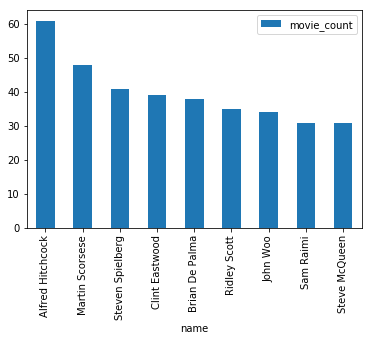

In [20]:
statsToPlot = dfStatsMovieByDirector[dfStatsMovieByDirector.movie_count > 30][['name','movie_count']] \
    .set_index('name')
statsToPlot.plot(kind='bar')

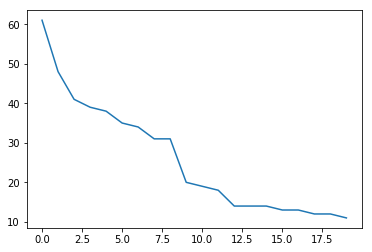

In [21]:
# 1 methode par type de graphe : plot, bar, piechart, ...
movie_count_ndarray = dfStatsMovieByDirector.movie_count.values
plt.plot(movie_count_ndarray)


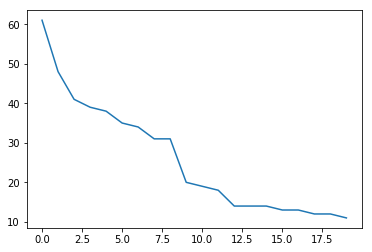

In [22]:
# fig : l'ensemble du dessin
# ax : 1 tracé
fig, ax = plt.subplots()
ax.plot(movie_count_ndarray)

Text(0.5,1,'diag bar')

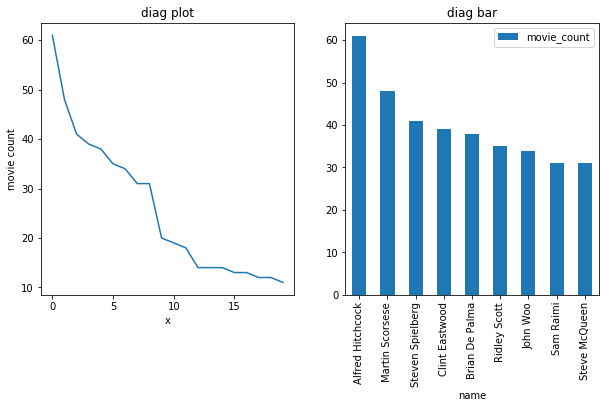

In [23]:
# fig : l'ensemble du dessin
# ax1, ax2 : 2 tracés
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))
# NB: fig, ((ax1, ax2),(ax3,ax4)) = plt.subplots(2,2)

# tracé 1 sur ax1
ax1.plot(movie_count_ndarray)
ax1.set_xlabel('x')
ax1.set_ylabel('movie count')
ax1.set_title('diag plot')
# tracé 2 sur ax2
statsToPlot.plot(kind='bar', ax=ax2)
ax2.set_title('diag bar')


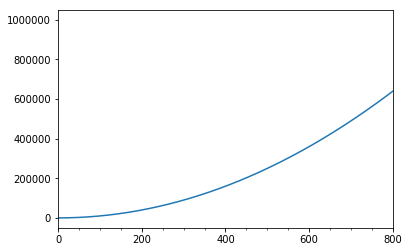

In [24]:
x = np.arange(1000)
y = x**2+1
fig, ax = plt.subplots()
ax.plot(x,y)
ax.set_xlim(0, 800)
# graduation majeure sur l'axe des x (x axis)
ax.xaxis.set_major_locator(ticker.MultipleLocator(200))
# graduation mineure sur l'axe des x (x axis)
ax.xaxis.set_minor_locator(ticker.MultipleLocator(50))

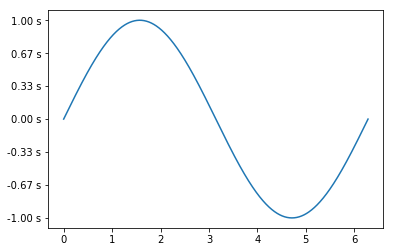

In [25]:
x = np.linspace(0,2*np.pi, 1000)
y = np.sin(x)
fig, ax = plt.subplots()
ax.plot(x,y)
# graduation majeure sur l'axe des y (y axis)
ax.yaxis.set_major_locator(ticker.MultipleLocator(1/3))
# formattage des labels sur la graduation
# https://matplotlib.org/3.1.1/gallery/ticks_and_spines/tick-formatters.html
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y,_: f'{y:.2f} s'))
# graduation mineure sur l'axe des y (y axis)
#ax.xaxis.set_minor_locator(ticker.MultipleLocator(50))

In [26]:
# formattage et graduation de datetime, ...
mdates.YearLocator()
mdates.MonthLocator()
mdates.DayLocator()
mdates.DateFormatter('%Y-%m')

# RENDU

In [27]:
dfStarsBirthYear = pd.read_json(f'http://localhost:8000/stars/by_birthdate?year=1968', convert_dates=['birthdate'])
dfStarsBirthYear.set_index('id', inplace=True)
dfStarsBirthYear

,name,birthdate
id,,
1173,Aaron Eckhart,1968-01-01
2746781,Alan Bond,1968-01-01
97304,Alicia Borrachero,1968-01-01
1759449,Americo Presciutti,1968-01-01
752407,Amy Ryan,1968-01-01
...,...,...
270940,Verona Pooth,1968-01-01
210885,Vincent De Paul,1968-01-01
301925,Vincent Gale,1968-01-01


In [28]:
dfMoviesTitle = pd.read_json(f'http://localhost:8000/movies/by_parttitle?title=Star')
dfMoviesTitle.set_index('id', inplace=True)
dfMoviesTitle

,title,year,duration
id,,,
25830,The Star Packer,1934,53.0
49793,Star in the Dust,1956,80.0
76759,Star Wars: Episode IV - A New Hope,1977,121.0
80684,Star Wars: Episode V - The Empire Strikes Back,1980,124.0
86190,Star Wars: Episode VI - Return of the Jedi,1983,131.0
95405,Starry is the Night,1988,94.0
778043,Seeing Stars,1927,NaN
2488496,Star Wars: Episode VII - The Force Awakens,2015,138.0
2527338,Star Wars: Episode IX - The Rise of Skywalker,2019,142.0


In [29]:
#dfStatsActor = pd.read_json(f'http://localhost:8000/stars/stats_movie_by_actor?')
#dfStatsActor.set_index('id', inplace=True)
#dfStatsActor

responseActor = requests.get('http://localhost:8000/stars/stats_movie_by_actor')
responseActor


<Response [200]>

In [30]:
dataActor_json = responseActor.json()
dataActor_json
# applatir en list de dicts

data_flatten = [ {**actor_dict, 'movie_count': movie_count,'first_year_movie':first_year_movie,'last_year_movie':last_year_movie }  
         for actor_dict, movie_count,first_year_movie,last_year_movie in dataActor_json ]
data_flatten


[{'birthdate': '1907-05-26',
  'name': 'John Wayne',
  'id': 78,
  'movie_count': 172,
  'first_year_movie': 1926,
  'last_year_movie': 1976},
 {'birthdate': '1884-03-16',
  'name': 'Harrison Ford',
  'id': 1230,
  'movie_count': 86,
  'first_year_movie': 1915,
  'last_year_movie': 1932},
 {'birthdate': '1930-08-25',
  'name': 'Sean Connery',
  'id': 125,
  'movie_count': 73,
  'first_year_movie': 1954,
  'last_year_movie': 2012},
 {'birthdate': '1946-07-06',
  'name': 'Sylvester Stallone',
  'id': 230,
  'movie_count': 72,
  'first_year_movie': 1969,
  'last_year_movie': 2019},
 {'birthdate': '1956-07-09',
  'name': 'Tom Hanks',
  'id': 158,
  'movie_count': 69,
  'first_year_movie': 1980,
  'last_year_movie': 2043},
 {'birthdate': '1960-10-18',
  'name': 'Jean-Claude Van Damme',
  'id': 241,
  'movie_count': 66,
  'first_year_movie': 1979,
  'last_year_movie': 2019},
 {'birthdate': '1930-05-31',
  'name': 'Clint Eastwood',
  'id': 142,
  'movie_count': 63,
  'first_year_movie': 1955,

In [31]:
dfStatsActor = pd.DataFrame(data_flatten)
dfStatsActor.set_index('id', inplace=True)
dfStatsActor

,birthdate,name,movie_count,first_year_movie,last_year_movie
id,,,,,
78,1907-05-26,John Wayne,172,1926,1976
1230,1884-03-16,Harrison Ford,86,1915,1932
125,1930-08-25,Sean Connery,73,1954,2012
230,1946-07-06,Sylvester Stallone,72,1969,2019
158,1956-07-09,Tom Hanks,69,1980,2043
...,...,...,...,...,...
915618,1939-01-01,Patrick Wayne,10,1950,1971
919798,1946-01-01,Frank Welker,10,1981,2019
936728,1905-01-01,Grant Withers,10,1943,1955


In [32]:
dfMovieYear = dfMovies.groupby(pd.Grouper(key='year')).count()[['title']]
dfMovieYear
dfStarYear = dfStars.groupby(pd.Grouper(key='birthdate',freq='1Y')).count()[['name']]
dfStarYear
dfMovieYear.tail(10)

,title
year,
2013,28
2016,15
2014,26
2019,28
2015,30
2017,22
2020,6
2018,20
2022,1


Text(0,0.5,'count')

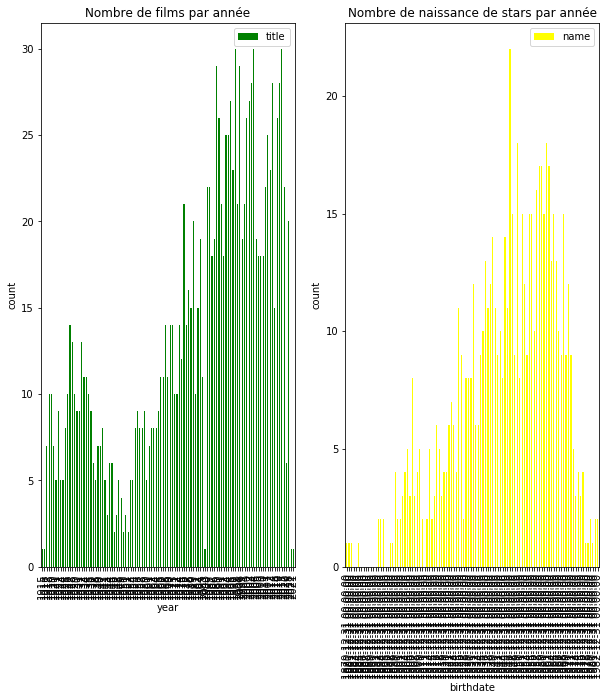

In [33]:
fig,((ax1,ax2)) = plt.subplots(1,2,figsize=(10,10))
dfMovieYear.plot(ax=ax1,kind='bar', color='green')
ax1.set_title('Nombre de films par année')
ax1.set_ylabel('count')
#ax1.set_xlim(1900,2020)
dfStarYear.plot(ax=ax2,kind='bar',color='yellow')
ax2.set_title('Nombre de naissance de stars par année')
ax2.set_ylabel('count')
#ax2.set_xlim(datetime(1900,1,1),datetime(2020,1,1))

In [34]:
limit=10
responseStar = requests.get(f'http://localhost:8000/stars/stats_movie_by_actor?limit={limit}')
responseStar

<Response [200]>

In [35]:
dataStar_json = responseStar.json()
dataStar_json
# applatir en list de dicts

data_flatten = [ {**actor_dict, 'movie_count': movie_count,'first_year_movie':first_year_movie,'last_year_movie':last_year_movie }  
         for actor_dict, movie_count,first_year_movie,last_year_movie in dataActor_json ]
data_flatten


[{'birthdate': '1907-05-26',
  'name': 'John Wayne',
  'id': 78,
  'movie_count': 172,
  'first_year_movie': 1926,
  'last_year_movie': 1976},
 {'birthdate': '1884-03-16',
  'name': 'Harrison Ford',
  'id': 1230,
  'movie_count': 86,
  'first_year_movie': 1915,
  'last_year_movie': 1932},
 {'birthdate': '1930-08-25',
  'name': 'Sean Connery',
  'id': 125,
  'movie_count': 73,
  'first_year_movie': 1954,
  'last_year_movie': 2012},
 {'birthdate': '1946-07-06',
  'name': 'Sylvester Stallone',
  'id': 230,
  'movie_count': 72,
  'first_year_movie': 1969,
  'last_year_movie': 2019},
 {'birthdate': '1956-07-09',
  'name': 'Tom Hanks',
  'id': 158,
  'movie_count': 69,
  'first_year_movie': 1980,
  'last_year_movie': 2043},
 {'birthdate': '1960-10-18',
  'name': 'Jean-Claude Van Damme',
  'id': 241,
  'movie_count': 66,
  'first_year_movie': 1979,
  'last_year_movie': 2019},
 {'birthdate': '1930-05-31',
  'name': 'Clint Eastwood',
  'id': 142,
  'movie_count': 63,
  'first_year_movie': 1955,

In [38]:
dfStatsStar = pd.DataFrame(data_flatten)
dfStatsStar

,birthdate,name,id,movie_count,first_year_movie,last_year_movie
0,1907-05-26,John Wayne,78,172,1926,1976
1,1884-03-16,Harrison Ford,1230,86,1915,1932
2,1930-08-25,Sean Connery,125,73,1954,2012
3,1946-07-06,Sylvester Stallone,230,72,1969,2019
4,1956-07-09,Tom Hanks,158,69,1980,2043
...,...,...,...,...,...,...
161,1939-01-01,Patrick Wayne,915618,10,1950,1971
162,1946-01-01,Frank Welker,919798,10,1981,2019
163,1905-01-01,Grant Withers,936728,10,1943,1955
164,1977-01-01,Michael Fassbender,1055413,10,2001,2017


In [41]:
dfStatsStar10 = dfStatsStar[:10]#.set_index('name')
dfStatsStar10

,birthdate,name,id,movie_count,first_year_movie,last_year_movie
0,1907-05-26,John Wayne,78,172,1926,1976
1,1884-03-16,Harrison Ford,1230,86,1915,1932
2,1930-08-25,Sean Connery,125,73,1954,2012
3,1946-07-06,Sylvester Stallone,230,72,1969,2019
4,1956-07-09,Tom Hanks,158,69,1980,2043
5,1960-10-18,Jean-Claude Van Damme,241,66,1979,2019
6,1930-05-31,Clint Eastwood,142,63,1955,2018
7,1942-07-13,Harrison Ford,148,63,1966,2020
8,1947-07-30,Arnold Schwarzenegger,216,56,1970,2019
9,1968-09-25,Will Smith,226,48,1988,2020


In [43]:
MovieCount = dfStatsStar10.loc[:,['name', 'movie_count']]
MovieCount

,name,movie_count
0,John Wayne,172
1,Harrison Ford,86
2,Sean Connery,73
3,Sylvester Stallone,72
4,Tom Hanks,69
5,Jean-Claude Van Damme,66
6,Clint Eastwood,63
7,Harrison Ford,63
8,Arnold Schwarzenegger,56
9,Will Smith,48


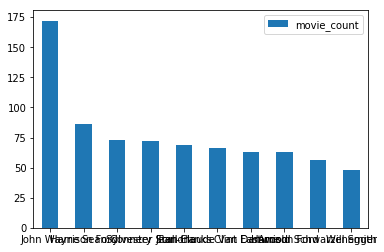

In [50]:
labels = MovieCount.name
plot = MovieCount.plot.bar(rot=0)
plot.set_xticklabels(labels)
plot.legend()

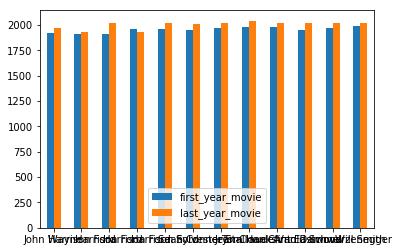

In [42]:
first_year = dfStatsStar10.loc[:,['name', 'first_year_movie']]
last_year = dfStatsStar10.loc[:,['name', 'last_year_movie']]
df = pd.merge(first_year,last_year)
labels = df.name
x = np.arange(len(labels)) 
plot = df.plot.bar(rot=0)
#plot.set_xticks(x)
plot.set_xticklabels(labels)
plot.legend()

#plot.set_xlim(1900,2000)